###### Spotify data analysis

Music is universal. It’s more than a billion-dollar industry, and it is omnipresent. How many hours in a row do you ever go without listening to music? I believe that music is a way of life. Listening to it makes my mind and soul feel great. I consider it a source of motivation, and as an ancient sage said: "Life without music would be a mistake".


Spotify is a digital music, podcast, and video streaming service that gives us access to millions of songs and other content from artists all over the world. The purpose of this Spotify analysis project is to analyze how different or how similar is the music that different artists on the app produce. We will get to know which tracks/artists are the best, taking into consideration the numerical features like popularity, danceability, loudness, number of views, follower info etc. To achieve this, I would be sourcing 3 Spotify datasets from 3 different sources, a flat file, Spotify API and HTML data. Let’s explore each dataset. 


Lets do some data cleaning and prepare the data for the analysis.
To achieve this let’s explore each dataset. 


###### CSV file
Assesing the flat file source dataset i.e, tracks.csv taken from Kaggle.

URL - https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

Dataset attibutes overview

	Id : id of track
	name  : name of track
	popularity : popularity of track
	duration_ms : time duration of track in ms
	explicit - whether it contains explicit (1) content or not (0)
	artists - artists contributed to the track
	id_artists - id of artists contributed to the track
	release_date : the release date of the album containing this track
	danceability : how suitable the track is for dancing, 0(not danceable)->1(very danceable)
	energy - how energetic the track is, 0(less energetic)->1(very energetic)
	key - the major key of the track, 0:C, 1:C#, 2:D, ..., 11:B
	loudness - how loud the song is in dB -60(very quiet)->0(very loud)
	mode -  whether the track is major (1) or minor (0)
	speechiness - the ratio of spoken words to the overall, 0(instrumental)->1(talk show)
	acousticness - whether the song is acoustic or not, 0(not acoustic)->1(very acoustic)
	instrumentalness - the ratio of instrumental sounds overall, 0(lot of vocal sounds)->1(instrument sounds)
	liveness - presence of audience, 0(studio record)->1(concert)
	valence - how positive the music is, 0(sad)->1(cheerful)
	tempo - tempo of track in BPM
	time_signature - the predicted time signature of the track, most typically 4


I will now assess the tracks dataset and will proceed with the next steps of data wrangling by replacing headers to make the dataset more meaningful, identifying duplicates, outliers and null values, formatting the attributes like artist_id and artist names as the data is in square braces. There are few tracks with multiple artists. I would be excluding this data for my analysis. I will also drop few columns which are not required for my analysis. 

In [1]:
import pandas as pd

In [2]:
tracks_df = pd.read_csv('tracks.csv')

In [3]:
tracks_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
tracks_df.shape

(586672, 20)

There are 586672 tracks in the dataset with 20 columns.

In [5]:
tracks_df.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [6]:
tracks_df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


The popularity column has values ranging from 1 to 100 and the mean value is 27 which means that majority of the popularity rank falls below 50. For our analysis I would be considering the artist details, whose track's popularity is above 70 for atleast 1 track.

In [7]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

Among the 20 atributes, I wont be using 'time_signature','mode','key','tempo' attributes as they are not useful for my analysis.

In [8]:
tracks_df.drop(columns=['time_signature','mode','key','tempo'], inplace=True)

In [9]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  loudness          586672 non-null  float64
 11  speechiness       586672 non-null  float64
 12  acousticness      586672 non-null  float64
 13  instrumentalness  586672 non-null  float64
 14  liveness          586672 non-null  float64
 15  valence           586672 non-null  float64
dtypes: float64(8), int64

In [10]:
tracks_df = tracks_df.rename(columns = {'id': 'track_id', 'name': 'track_name', 'artists': 'artist_name', 'id_artists':'artist_id' }, inplace = False)

In [11]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          586672 non-null  object 
 1   track_name        586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artist_name       586672 non-null  object 
 6   artist_id         586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  loudness          586672 non-null  float64
 11  speechiness       586672 non-null  float64
 12  acousticness      586672 non-null  float64
 13  instrumentalness  586672 non-null  float64
 14  liveness          586672 non-null  float64
 15  valence           586672 non-null  float64
dtypes: float64(8), int64

In [12]:
null_columns=tracks_df.columns[tracks_df.isnull().any()]
tracks_df[null_columns].isnull().sum()

track_name    71
dtype: int64

Another area of concern is that 71 tracks have null values for track_name . So I will be omitting those records as it wont be helpful for my analysis 

In [13]:
tracks_df[tracks_df["track_name"].isnull()]

,track_id,track_name,popularity,duration_ms,explicit,artist_name,artist_id,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
226336,4iH7negBYMfj2z0wDNmgdx,NaN,28,264973,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1994-01-01,0.512,0.578,-12.280,0.0299,0.0433,0.000064,0.5160,0.692
510975,04d5kbLvSAIBt3pGcljdhC,NaN,0,184293,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.426,0.285,-11.970,0.0466,0.9950,0.264000,0.2930,0.583
510976,05tRkgyxVdwMePGqOXMDYU,NaN,0,191587,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.344,0.186,-13.495,0.0745,0.9950,0.000000,0.1150,0.290
510978,0YAMRgAQH6tkTh4sWNXr8L,NaN,0,191573,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.316,0.257,-13.611,0.0549,0.9950,0.769000,0.5190,0.529
510979,1K6MQQxmFpPb66ZnaiIpHX,NaN,0,167602,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.558,0.283,-12.847,0.0646,0.9960,0.000000,0.4530,0.608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517206,6OH9mz9aFbGlbf74cBwYWD,NaN,2,209760,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.506,0.598,-4.672,0.0635,0.7710,0.000001,0.6910,0.800
517215,15RqFDA86slfzujSQMEX4i,NaN,2,257280,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.612,0.615,-5.609,0.0551,0.8540,0.000023,0.0541,0.809
520127,0hKA9A2JPtFdg0fiMhyjQD,NaN,6,194081,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1974-12-31,0.471,0.369,-12.927,0.1460,0.9680,0.001100,0.1410,0.766
525238,1kR4gIb7nGxHPI3D2ifs59,NaN,26,289440,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1998-01-05,0.501,0.583,-9.460,0.0605,0.6900,0.003960,0.0747,0.734


Now dropping the records whose track names is null. 

In [14]:
tracks_df = tracks_df.dropna()

In [15]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          586601 non-null  object 
 1   track_name        586601 non-null  object 
 2   popularity        586601 non-null  int64  
 3   duration_ms       586601 non-null  int64  
 4   explicit          586601 non-null  int64  
 5   artist_name       586601 non-null  object 
 6   artist_id         586601 non-null  object 
 7   release_date      586601 non-null  object 
 8   danceability      586601 non-null  float64
 9   energy            586601 non-null  float64
 10  loudness          586601 non-null  float64
 11  speechiness       586601 non-null  float64
 12  acousticness      586601 non-null  float64
 13  instrumentalness  586601 non-null  float64
 14  liveness          586601 non-null  float64
 15  valence           586601 non-null  float64
dtypes: float64(8), int64

In [16]:
cols = ['artist_name', 'artist_id']
for col in cols:
    tracks_df[col] = tracks_df[col].map(lambda x: str(x).lstrip("['").rstrip("']")).astype(str)

The artist_name and artist_id columns have data enclosed in square braces and quotes. Hence stripped those special characters.

In [17]:
tracks_df

,track_id,track_name,popularity,duration_ms,explicit,artist_name,artist_id,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.4450,-13.338,0.4510,0.674,0.744000,0.1510,0.1270
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.695,0.2630,-22.136,0.9570,0.797,0.000000,0.1480,0.6550
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.434,0.1770,-21.180,0.0512,0.994,0.021800,0.2120,0.4570
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.321,0.0946,-27.961,0.0504,0.995,0.918000,0.1040,0.3970
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,1922,0.402,0.1580,-16.900,0.0390,0.989,0.130000,0.3110,0.1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,阿YueYue,1QLBXKM5GCpyQQSVMNZqrZ,2020-09-26,0.560,0.5180,-7.471,0.0292,0.785,0.000000,0.0648,0.2110
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,ROLE MODEL,1dy5WNgIKQU6ezkpZs4y8z,2020-10-21,0.765,0.6630,-5.223,0.0652,0.141,0.000297,0.0924,0.6860
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,FINNEAS,37M5pPGs6V1fchFJSgCguX,2020-09-02,0.535,0.3140,-12.823,0.0408,0.895,0.000150,0.0874,0.0663
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"Gentle Bones', 'Clara Benin","4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2gkqjn",2021-03-05,0.696,0.6150,-6.212,0.0345,0.206,0.000003,0.3050,0.4380


Now that the data is formatted by removing headers and updating column names, removing data with null track names and formatting the artist id and name columns for our convienience. I will now check if there are any outliers or bad data

In [18]:
cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'explicit']
for col in cols:
    print("column : ",col)
    print("min : ",tracks_df[col].min())
    print("max : ",tracks_df[col].max())

column :  danceability
min :  0.0
max :  0.991
column :  energy
min :  0.0
max :  1.0
column :  loudness
min :  -60.0
max :  5.376
column :  speechiness
min :  0.0
max :  0.971
column :  acousticness
min :  0.0
max :  0.996
column :  instrumentalness
min :  0.0
max :  1.0
column :  liveness
min :  0.0
max :  1.0
column :  valence
min :  0.0
max :  1.0
column :  explicit
min :  0
max :  1


All the numeric values in the dataset are within the range mentioned in dataset description and hence I dont find any bad data.

<AxesSubplot:xlabel='loudness'>

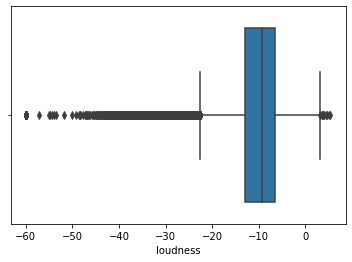

In [19]:
import seaborn as sns
sns.boxplot(x=tracks_df['loudness'])

Above plot has outliers between -60 to -25 and from 3 to 6. these observations are not included in the box of other observations. But I wont exclude this data as I plan to analyze the tracks popularity based on all the features like danceability, acousticness, loudness, speechiness etc.

In [20]:
duplicate = tracks_df[tracks_df.duplicated()]
duplicate

,track_id,track_name,popularity,duration_ms,explicit,artist_name,artist_id,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence


In [21]:
duplicate = tracks_df[tracks_df.duplicated('track_id')]
duplicate

,track_id,track_name,popularity,duration_ms,explicit,artist_name,artist_id,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence


I dont see any duplicate track ids. So the dataset looks clean. We can now proceed with our EDA for the csv dataset.

######  HTML source

Cleaning and preparing the HTML source data.

HTML – The data set has information most streamed artists ever on Spotify along with the streams count, number of tracks and number of tracks crossing benchmark number. 
Data Source - https://chartmasters.org/most-streamed-artists-ever-on-spotify/


	Artist Name 
	Lead Streams
	Featured Streams
	Tracks
	1b+
	100m+ 
	10m+
	1m+
	Last Update



In [22]:
import requests
import lxml.html as lh
import pandas as pd

In [23]:
pd.set_option('max_colwidth', 12)

In [24]:
url='https://chartmasters.org/most-streamed-artists-ever-on-spotify/'

Create a handle, page, to handle the contents of the website

In [25]:
page = requests.get(url)

Store the contents of the website under doc

In [26]:
doc = lh.fromstring(page.content)

Parse data that are stored between <tr>..</tr> of HTML

In [27]:
tr_elements = doc.xpath('//tr')

For sanity check, ensure that all the rows have the same width.
If not, we probably got something more than just the table.
Check the length of the first 12 rows

In [28]:
print([len(T) for T in tr_elements[:12]])

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


In [29]:
tr_elements = doc.xpath('//tr')

#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col.append((name,[]))



1:"#"
2:"Artist Name"
3:"Lead Streams"
4:"Featured Streams"
5:"Tracks"
6:"1b+"
7:"100m+"
8:"10m+"
9:"1m+"
10:"Last Update"


In [30]:
# Since out first row is the header, data is stored on the second row onwards
for j in range(1, len(tr_elements)):
    # T is our j'th row
    T = tr_elements[j]

    # If row is not of size 10, the //tr data is not from our table
    if len(T) != 10:
        break

    # i is the index of our column
    i = 0

    # Iterate through each element of the row
    for t in T.iterchildren():
        data = t.text_content()
        # Check if row is empty
        if i > 0:
            # Convert any numerical value to integers
            try:
                data = int(data)
            except:
                pass
        # Append the data to the empty list of the i'th column
        col[i][1].append(data)
        # Increment i for the next column
        i += 1

print([len(C) for (title,C) in col])



[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


Perfect! This shows that each of our 10 columns has exactly 1000 values.

In [31]:
# Now lets create a dataframe

Dict={title:column for (title,column) in col}
html_df=pd.DataFrame(Dict)

html_df.head()

,#,Artist Name,Lead Streams,Featured Streams,Tracks,1b+,100m+,10m+,1m+,Last Update
0,1,Drake,"38,372,2...","15,053,3...",227,3,93,215,222,05/31/21
1,2,Ed Sheeran,"28,896,5...","2,178,58...",177,6,52,140,161,05/31/21
2,3,Ariana G...,"25,153,1...","1,629,67...",178,4,58,120,170,06/01/21
3,4,Bad Bunny,"24,484,0...","3,756,30...",137,1,70,129,136,06/01/21
4,5,Post Malone,"24,064,8...","2,078,90...",65,8,49,63,64,06/01/21


In [32]:
html_df.shape

(1000, 10)

There are 1000 records of top artists in the dataset with 10 attributes

In [33]:
html_df.dtypes

#                   object
Artist Name         object
Lead Streams        object
Featured Streams    object
Tracks              object
1b+                  int64
100m+                int64
10m+                 int64
1m+                  int64
Last Update         object
dtype: object

In [34]:
html_df.describe()

,1b+,100m+,10m+,1m+
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.186000,6.571000,38.666000,104.461000
std,0.672202,8.602381,27.644505,65.101157
min,0.000000,0.000000,0.000000,10.000000
25%,0.000000,2.000000,20.000000,59.000000
50%,0.000000,4.000000,31.000000,89.000000
75%,0.000000,8.000000,48.000000,131.000000
max,8.000000,93.000000,215.000000,582.000000


From the above details we can make out that a there is a max of 8 tracks from a single artist which crossed 1 billion views.

In [35]:
html_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   #                 1000 non-null   object
 1   Artist Name       1000 non-null   object
 2   Lead Streams      1000 non-null   object
 3   Featured Streams  1000 non-null   object
 4   Tracks            1000 non-null   object
 5   1b+               1000 non-null   int64 
 6   100m+             1000 non-null   int64 
 7   10m+              1000 non-null   int64 
 8   1m+               1000 non-null   int64 
 9   Last Update       1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


Among the 10 atributes, I wont be using ranking which is '# ','Featured Streams'(as we are only looking up at artist singles) and 'Last Update' attributes as they are not useful for my analysis.

In [36]:
html_df.drop(columns=['#','Featured Streams','Last Update'], inplace=True)

In [37]:
html_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Artist Name   1000 non-null   object
 1   Lead Streams  1000 non-null   object
 2   Tracks        1000 non-null   object
 3   1b+           1000 non-null   int64 
 4   100m+         1000 non-null   int64 
 5   10m+          1000 non-null   int64 
 6   1m+           1000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


In [38]:
html_df.head()

,Artist Name,Lead Streams,Tracks,1b+,100m+,10m+,1m+
0,Drake,"38,372,2...",227,3,93,215,222
1,Ed Sheeran,"28,896,5...",177,6,52,140,161
2,Ariana G...,"25,153,1...",178,4,58,120,170
3,Bad Bunny,"24,484,0...",137,1,70,129,136
4,Post Malone,"24,064,8...",65,8,49,63,64


In [39]:
html_df = html_df.rename(columns = {'Artist Name':'ArtistName','Lead Streams':'Lead_Streams','1b+': '1billion_plus_views', '100m+': '100million_plus_views', '10m+': '10million_plus_views', '1m+':'1million_plus_views' }, inplace = False)

In [40]:
html_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ArtistName             1000 non-null   object
 1   Lead_Streams           1000 non-null   object
 2   Tracks                 1000 non-null   object
 3   1billion_plus_views    1000 non-null   int64 
 4   100million_plus_views  1000 non-null   int64 
 5   10million_plus_views   1000 non-null   int64 
 6   1million_plus_views    1000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


In [41]:
html_df.isnull().any()

ArtistName               False
Lead_Streams             False
Tracks                   False
1billion_plus_views      False
100million_plus_views    False
10million_plus_views     False
1million_plus_views      False
dtype: bool

The data has no null values.

Now that the data is formatted by removing headers and updating column names, checking for null values(In this case the data looks good without nulls). I will now check if there are any outliers or bad data

Before checking on the outliers I would like to convert the columns 'Lead Streams' and 'Tracks' from object type to Integer. For doing that I will remove the commas from these attribute values before typecasting.

'''
cols=['Lead Streams','Tracks']
for col in cols:
    html_df[col]=html_df[col].str.replace(',','')
    #html_df[col]=html_df[col].astype(str).astype(int)


html_df['Tracks']=html_df['Tracks'].astype(int)
html_df.dtypes
'''

In [42]:
html_df['Lead_Streams']=html_df['Lead_Streams'].str.replace(',','')
html_df['Lead_Streams']=html_df['Lead_Streams'].astype(str).astype(int)

html_df.dtypes

ArtistName               object
Lead_Streams              int64
Tracks                   object
1billion_plus_views       int64
100million_plus_views     int64
10million_plus_views      int64
1million_plus_views       int64
dtype: object

In [43]:
cols = ['Lead_Streams', '1billion_plus_views', '100million_plus_views', '10million_plus_views', '1million_plus_views']
for col in cols:
    print("column : ",col)
    print("min : ",html_df[col].min())
    print("max : ",html_df[col].max())

column :  Lead_Streams
min :  998207667
max :  38372256749
column :  1billion_plus_views
min :  0
max :  8
column :  100million_plus_views
min :  0
max :  93
column :  10million_plus_views
min :  0
max :  215
column :  1million_plus_views
min :  10
max :  582


All the numeric values in the dataset looks good as per the attribute description. I dont find any bad data.

'
import seaborn as sns
sns.boxplot(x=html_df['Tracks'])
'

'
Track counts of majority of artists in the list ranges from 1 to 200. Rest are considered as outliers here.
'

<AxesSubplot:xlabel='1billion_plus_views'>

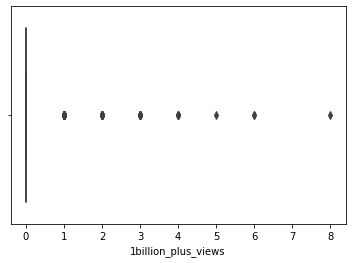

In [44]:
import seaborn as sns
sns.boxplot(x=html_df['1billion_plus_views'])

There are very few artists whose track views crossed a billion. Hence all the data above zero is considered as outliers as they are very few in the list.

<AxesSubplot:xlabel='10million_plus_views'>

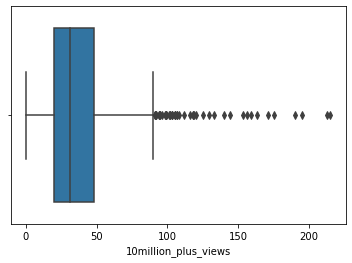

In [45]:
import seaborn as sns
sns.boxplot(x=html_df['10million_plus_views'])

Above plot for 10million_plus_views has outliers for number of tracks more than 85 for a single artist.Which means that most of the artists has 10 million views for around 20 to 50 tracks.

<AxesSubplot:xlabel='1million_plus_views'>

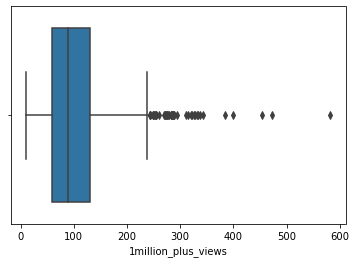

In [46]:
import seaborn as sns
sns.boxplot(x=html_df['1million_plus_views'])

Above plot for 1million_plus_views has outliers for number of tracks more than 230 for a single artist. Majority of artists has 50 to 150 tracks of them crossing a million. 

These observations(outliers)for all the above plots are not included in the box of other observations. But I wont exclude this data as I plan to analyize the artist's popularity and number of views is a basic measure to analyze this.

In [47]:
duplicate = html_df[html_df.duplicated()]
duplicate

,ArtistName,Lead_Streams,Tracks,1billion_plus_views,100million_plus_views,10million_plus_views,1million_plus_views


In [48]:
duplicate = html_df[html_df.duplicated('ArtistName')]
duplicate

,ArtistName,Lead_Streams,Tracks,1billion_plus_views,100million_plus_views,10million_plus_views,1million_plus_views


This shows that there are no duplicate records and the artist names are also unique. Now the HTML data looks good and is ready for the EDA.

######  API Source

API Endpoint - GET https://api.spotify.com/v1/artists/{id}

API documentation URL - https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-an-artist

To get Spotify catalog information for a single artist identified by their unique Spotify ID. API calls were done passing artist_id from the tracks.csv file. To do this I extracted artist_ids whose tracks  popularity value is greater than 70 as the tracks dataset is too huge. By doing this, I get a list of 1737 artist ids which I would use to get the api data.

Dataset attibutes overview

    external_urls – Known external URLs for this artist.
    Followers - Information about the followers of the artist.
    Genres - A list of the genres the artist is associated with.
    Href - A link to the Web API endpoint providing full details of the artist.
    Id – The Spotify ID for the artist.
    Images - Images of the artist in various sizes, widest first.
    Name - The name of the artist.
    Popularity - The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular.                    The artist’s popularity is calculated from the popularity of all the artist’s tracks.
    Type – The object type: "artist"
    Uri - The Spotify URI for the artist.




In [49]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data
import json
import timeit

In [50]:
pd.set_option("display.max_columns", 100)

In [51]:
## csv file
# Loading tracks data in dataframe
tracks = pd.read_csv('tracks.csv')

tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4j...,Carve,6,126903,0,['Uli'],['45tIt0...,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sd...,Capítulo...,0,98200,0,['Fernan...,['14jtPC...,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yeht...,Vivo par...,0,181640,0,['Ignaci...,['5LiOoJ...,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhx...,El Prisi...,0,176907,0,['Ignaci...,['5LiOoJ...,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9Gfoq...,Lady of ...,0,163080,0,['Dick H...,['3BiJGZ...,1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


Accesing Spotify API

In [52]:
client_id = 'dcf584233ff048deb12ad60850f08e97'
client_secret = 'fdfbeee1094e4c72a85bb7d8c2eaf907'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp_api = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

From tracks_df I will filter artist data whose track popularity for atleast one song is more than 70.

In [53]:
tracks_filter= tracks.filter(["id_artists", "popularity"])

tracks_filter = tracks_filter[~tracks_filter.id_artists.str.contains(",")]

tracks_filter=  tracks_filter[(tracks_filter.popularity) >70 ]
tracks_filter.pop("popularity")

31498     71
31499     71
32498     77
33498     77
33499     71
          ..
584916    72
585189    72
585190    71
585191    71
586668    72
Name: popularity, Length: 4257, dtype: int64

Get the unique artist_id list which we can use to extract API data

In [54]:
tracks_filter = tracks_filter.id_artists.unique()
tracks_filter.shape[0]

1737

In [55]:
tic = timeit.default_timer()

Lets load the data returned by spotify API to a file

In [56]:
with open('artist.json', 'w') as f:
    for id in tracks_filter:
        try:
            idnew = id.replace("['","").replace("']","")
            result = sp_api.artist(idnew)
            json.dump(result, f)
            f.write('\n')
        except:
            continue

f.close()

In [57]:
toc = timeit.default_timer()
print("time to import data in dataframe : ",toc-tic)

time to import data in dataframe :  170.93431265700002


Loading the data from json file to a dataframe

In [58]:
json_df = pd.read_json (r'artist.json', lines=True)
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   external_urls  1737 non-null   object
 1   followers      1737 non-null   object
 2   genres         1737 non-null   object
 3   href           1737 non-null   object
 4   id             1737 non-null   object
 5   images         1737 non-null   object
 6   name           1737 non-null   object
 7   popularity     1737 non-null   int64 
 8   type           1737 non-null   object
 9   uri            1737 non-null   object
dtypes: int64(1), object(9)
memory usage: 135.8+ KB


In [59]:
json_df.head(20)

,external_urls,followers,genres,href,id,images,name,popularity,type,uri
0,{'spotif...,{'href':...,[jazz bl...,https://...,7G1GBhoK...,[{'heigh...,Nina Simone,74,artist,spotify:...
1,{'spotif...,{'href':...,[adult s...,https://...,43ZHCT0c...,[{'heigh...,Elvis Pr...,82,artist,spotify:...
2,{'spotif...,{'href':...,[adult s...,https://...,293zczrf...,[{'heigh...,Chuck Berry,71,artist,spotify:...
3,{'spotif...,{'href':...,[adult s...,https://...,0iOVhN3t...,[{'heigh...,Etta James,72,artist,spotify:...
4,{'spotif...,{'href':...,[adult s...,https://...,3plJVWt8...,[{'heigh...,Ben E. King,69,artist,spotify:...
5,{'spotif...,{'href':...,[adult s...,https://...,0JDkhL4r...,[{'heigh...,Roy Orbison,71,artist,spotify:...
6,{'spotif...,{'href':...,[beatles...,https://...,3WrFJ7zt...,[{'heigh...,The Beatles,89,artist,spotify:...
7,{'spotif...,{'href':...,[baroque...,https://...,3oDbviii...,[{'heigh...,The Beac...,78,artist,spotify:...
8,{'spotif...,{'href':...,[arkansa...,https://...,6kACVPfC...,[{'heigh...,Johnny Cash,80,artist,spotify:...
9,{'spotif...,{'href':...,[classic...,https://...,74ASZWbe...,[{'heigh...,Bob Dylan,79,artist,spotify:...


In [60]:
json_df.shape

(1737, 10)

There are 1737 artist information in the dataset with 10 columns.

In [61]:
json_df.dtypes

external_urls    object
followers        object
genres           object
href             object
id               object
images           object
name             object
popularity        int64
type             object
uri              object
dtype: object

In [62]:
json_df.describe()

,popularity
count,1737.000000
mean,73.576857
std,8.121556
min,53.000000
25%,68.000000
50%,73.000000
75%,79.000000
max,100.000000


In [63]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   external_urls  1737 non-null   object
 1   followers      1737 non-null   object
 2   genres         1737 non-null   object
 3   href           1737 non-null   object
 4   id             1737 non-null   object
 5   images         1737 non-null   object
 6   name           1737 non-null   object
 7   popularity     1737 non-null   int64 
 8   type           1737 non-null   object
 9   uri            1737 non-null   object
dtypes: int64(1), object(9)
memory usage: 135.8+ KB


Among the 10 atributes, I wont be using 'external_urls','href','type' attributes as they are not useful for my analysis.

In [64]:
json_df.drop(columns=['external_urls','href','type','uri'], inplace=True)

In [65]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   followers   1737 non-null   object
 1   genres      1737 non-null   object
 2   id          1737 non-null   object
 3   images      1737 non-null   object
 4   name        1737 non-null   object
 5   popularity  1737 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 81.5+ KB


Renaming columns

In [66]:
json_df = json_df.rename(columns = {'followers': 'follower_count', 'popularity':'artist_popularity'}, inplace = False)

In [67]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   follower_count     1737 non-null   object
 1   genres             1737 non-null   object
 2   id                 1737 non-null   object
 3   images             1737 non-null   object
 4   name               1737 non-null   object
 5   artist_popularity  1737 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 81.5+ KB


Checking for null values in the datset

In [68]:
json_df.isnull().any()

follower_count       False
genres               False
id                   False
images               False
name                 False
artist_popularity    False
dtype: bool

The dataset has no null values.

The follower_count column is an object type with data in the format {'href': None, 'total':2171677}. Stripping the left and right side values(which is unique throughout the dataset) of the follower_count to use the numbers for our analysis.

In [69]:
json_df['follower_count'] = json_df['follower_count'].map(lambda x: str(x).lstrip("{'href': None, 'total': ").rstrip("'}'")).astype(str)

In [70]:
json_df.head()

,follower_count,genres,id,images,name,artist_popularity
0,2183579,[jazz bl...,7G1GBhoK...,[{'heigh...,Nina Simone,74
1,5466221,[adult s...,43ZHCT0c...,[{'heigh...,Elvis Pr...,82
2,1395242,[adult s...,293zczrf...,[{'heigh...,Chuck Berry,71
3,1189881,[adult s...,0iOVhN3t...,[{'heigh...,Etta James,72
4,404910,[adult s...,3plJVWt8...,[{'heigh...,Ben E. King,69


Now that the data is formatted by removing headers and updating column names, checking for null values(In this case the data looks good with no nulls). I will now check if there are any outliers or bad data

Before checking on the outliers I would like to convert the columns 'follower_count' from object type to Integer. 

In [71]:
json_df['follower_count']=json_df['follower_count'].astype(str).astype(int)

In [72]:
json_df.dtypes

follower_count        int64
genres               object
id                   object
images               object
name                 object
artist_popularity     int64
dtype: object

Now that the data is formatted by removing headers and updating column names, and formatting the follower_count. Also there are no duplicate records. 

I will now check if there are any outliers or bad data

<AxesSubplot:xlabel='artist_popularity'>

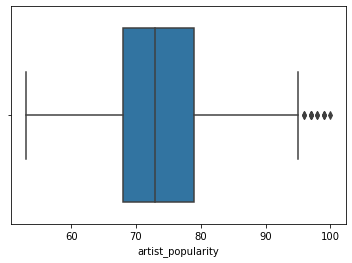

In [73]:
import seaborn as sns
sns.boxplot(x=json_df['artist_popularity'])

Above plot for popularity has outliers for popularity greater than 93. Majority of artists has popularity between 70 and 80. 

<AxesSubplot:xlabel='follower_count'>

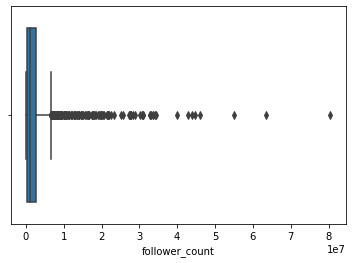

In [74]:
import seaborn as sns
sns.boxplot(x=json_df['follower_count'])

These observations(outliers)for the above plots are not included in the box of other observations. But I wont exclude this data as I plan to analyize the artist's popularity and followers as a basic measure to analyze this.

Now the data looks good and is ready for the EDA.

The three dataframes that we load into database are tracks_df,html_df and json_df

In [75]:
tracks_df.to_csv ('tracks_df.csv', index = False, header=True)

In [76]:
html_df.to_csv ('html_df.csv', index = False, header=True)

In [77]:
json_df.to_csv ('json_df.csv', index = False, header=True)